Se emplean funciones de data engineer, data analitics para realizar y obtener metricas y KPIs

In [99]:
# Se importan librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [101]:
# Se descargan archivos csv a asociados al análisis de datos
Acceso_internet_fijo_velocidadbajada_provincia=pd.read_csv('Datasets/AccesosaInternetfijoporvelocidadbajadayprovincia_2791741685050936567.csv')
Acceso_internet_fijo_velocidadbajada_localidad=pd.read_csv('Datasets/AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171685050986091.csv')
Conectividad_Servicio_Internet=pd.read_csv('Datasets/ConectividadalserviciodeInternet_2776151685051230707.csv')
Internet_Accesos_por_tecnologia=pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')
Internet_Accesos_velocidad=pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv')
Internet_BAF=pd.read_csv('Datasets/Internet_BAF.csv')
Internet_ingresos = pd.read_csv('Datasets/Internet_Ingresos.csv', encoding='utf-8')
Internet_Penetracion = pd.read_csv('Datasets\Internet_Penetracion.csv', encoding='utf-8')
Listado_localidades_conectividad_internet=pd.read_csv('Datasets/Listadodelocalidadesconconectividadainternet_2750221685051211461.csv')

Se considera para el análisis económico primeramente el DF asociado a Acceso_internet_fijo_velocidadbajada_provincia.
Debido a que la velocidad de internet es una medida indiecta de acceso a internet en el país y con ello de crecimiento 
económico asociado desde el punto de vista empresarial. 

In [102]:
#Evalúo el tipo de datos para cada columna con la finalidad de saber que debo normalizar
Acceso_internet_fijo_velocidadbajada_provincia.dtypes

Año           float64
Trimestre     float64
Provincia      object
Otros          object
0,256 Mbps     object
               ...   
80 Mbps        object
81 Mbps        object
83 Mbps        object
82 Mbps        object
86 Mbps        object
Length: 97, dtype: object

In [103]:
#Me aseguro que el tipo de dato quede como debe ser en cada columna
Acceso_internet_fijo_velocidadbajada_provincia['Año'] = Acceso_internet_fijo_velocidadbajada_provincia['Año'].fillna(0).astype(int)
Acceso_internet_fijo_velocidadbajada_provincia['Trimestre'] = Acceso_internet_fijo_velocidadbajada_provincia['Trimestre'].fillna(0).astype(int)

#Cambio los "-0" a "0"; esto debido a que no deseo quitarlo dado que los numeros asocidos a Mbps 
# # represetan nuúmero de personas con acceso a esa cantidad de Mbps

columnas_mbps = ['0,256 Mbps', '0,375 Mbps', '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '70 Mbps', '71 Mbps', '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps', '82 Mbps', '86 Mbps']
Acceso_internet_fijo_velocidadbajada_provincia[columnas_mbps] = Acceso_internet_fijo_velocidadbajada_provincia[columnas_mbps].replace('- 0', '0', regex=True)

#Elimino la fila que tiene valores nulos 
Acceso_internet_fijo_velocidadbajada_provincia.drop(480, inplace=True)

#Elimino la columna otros porque no la requiero, no entiendo su función
Acceso_internet_fijo_velocidadbajada_provincia.drop(columns=['Otros'], axis=1, inplace=True)

#Cambio finalmente todos los valores asociados a la columna Mbps a valores enteros y no str, con la finalidad de obtener métricas
# Y KPIs posteriormente 

Columnas_numericas = Acceso_internet_fijo_velocidadbajada_provincia.columns[3:]
Acceso_internet_fijo_velocidadbajada_provincia[Columnas_numericas] = Acceso_internet_fijo_velocidadbajada_provincia[Columnas_numericas].replace({",": ""}, regex=True).replace(r'[^\d.]+', '', regex=True).astype(int)

In [104]:
#Chequeo como vienen mis datos
Acceso_internet_fijo_velocidadbajada_provincia.dtypes

Año            int32
Trimestre      int32
Provincia     object
0,256 Mbps     int32
0,375 Mbps     int32
               ...  
80 Mbps        int32
81 Mbps        int32
83 Mbps        int32
82 Mbps        int32
86 Mbps        int32
Length: 96, dtype: object

In [ ]:
Acceso_internet_fijo_velocidadbajada_provincia

,Año,Trimestre,Provincia,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022,3,Buenos Aires,19,0,0,29774,192,4611,23098,...,3163,0,98387,0,2,223,0,1,0,0
1,2022,3,Capital Federal,31,0,0,451,35,1307,4435,...,3,0,30482,0,0,8,0,0,0,0
2,2022,3,Catamarca,0,0,0,34,37,0,384,...,0,0,0,0,0,0,0,0,0,0
3,2022,3,Chaco,0,225,111,234,2,0,876,...,0,0,0,0,0,0,0,0,0,0
4,2022,3,Chubut,8,0,0,69,32,836,608,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2017,4,Santa Cruz,0,0,0,68,0,0,78,...,0,0,0,0,0,0,0,0,0,0
476,2017,4,Santa Fe,0,0,0,3109,0,7637,26495,...,0,0,0,0,0,0,0,0,0,0
477,2017,4,Santiago Del Estero,0,0,0,41,0,909,2182,...,0,0,0,0,0,0,0,0,0,0
478,2017,4,Tierra Del Fuego,0,0,0,6,0,282,28,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Selecciono mis columnas a estudiar en este caso me interesa agrupar por provincia y año y debo seleccionar todos los rangos de Mbps
columnas = ['0,256 Mbps', '0,375 Mbps', '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
            '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
            '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
            '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
            '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
            '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
            '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
            '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
            '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
            '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
            '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
            '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
            '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
            '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps',
            '82 Mbps', '86 Mbps']

#Agrupo por Año y provincia
grouped_data = Acceso_internet_fijo_velocidadbajada_provincia.groupby(['Año', 'Provincia'])[columnas].sum()
grouped_data = grouped_data.reset_index() #Reindexo las columnas porque se desajustaron

max_columns = grouped_data[columnas].idxmax(axis=1) #Busco el valor máximo que en este caso está asociado al valor maximo entre cantidad de personas

#Busco por fila cual es la cantidad maxima de personas agrupada para una determinada Mbps
grouped_data['Cantidad de Personas'] = grouped_data.apply(lambda row: row[max_columns[row.name]], axis=1)

# Obtener el valor máximo y la columna correspondiente
max_values = grouped_data[columnas].max(axis=1)
max_columns = grouped_data[columnas].idxmax(axis=1)
grouped_data['Cantidad de Personas'] = max_values
grouped_data['Max_Velocidad'] = max_columns

# Mostrar resultado con las columnas deseadas
result = grouped_data[['Año', 'Provincia', 'Max_Velocidad', 'Cantidad de Personas']]
result

,Año,Provincia,Max_Velocidad,Cantidad de Personas
0,2017,Buenos Aires,6 Mbps,1346370
1,2017,Capital Federal,6 Mbps,503464
2,2017,Catamarca,6 Mbps,15074
3,2017,Chaco,6 Mbps,29234
4,2017,Chubut,6 Mbps,65963
...,...,...,...,...
139,2022,Santa Cruz,10 Mbps,27030
140,2022,Santa Fe,50 Mbps,613676
141,2022,Santiago Del Estero,10 Mbps,175702
142,2022,Tierra Del Fuego,12 Mbps,34816


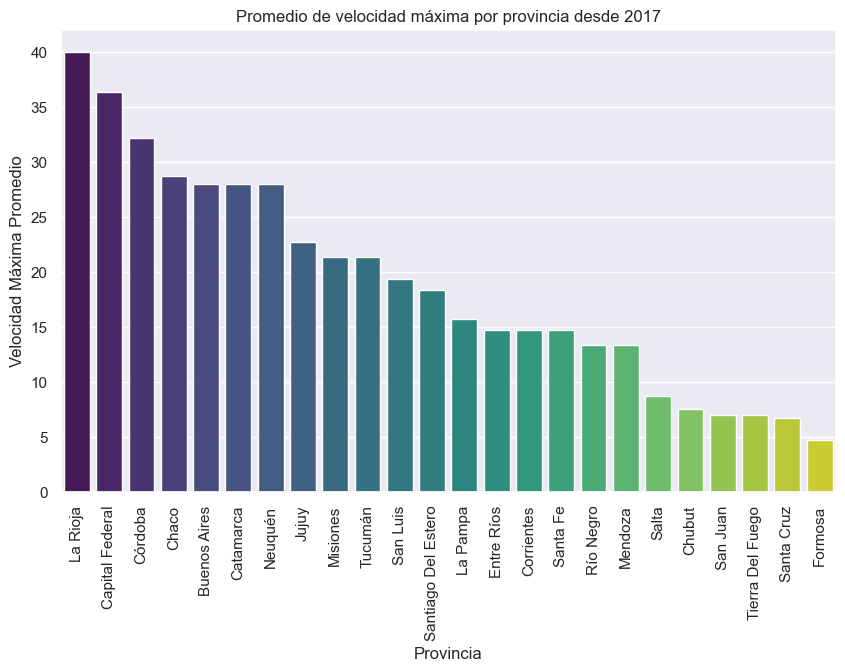

In [ ]:
import seaborn as sns

# Remover los caracteres no numéricos y convertir a tipo float
result.loc[:, 'Max_Velocidad'] = result['Max_Velocidad'].str.replace('\D', '', regex=True).astype(float)

# Calcular el promedio de velocidad máxima por provincia
promedio_por_provincia = result.groupby('Provincia')['Max_Velocidad'].mean()

# Ordenar las provincias por el promedio de velocidad máxima
promedio_por_provincia = promedio_por_provincia.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_por_provincia.index, y=promedio_por_provincia.values, palette="viridis")

plt.title('Promedio de velocidad máxima por provincia desde 2017')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Máxima Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()

#Nuestro resultado muestra la metrica de crecimiento promedio de velocidad de internet por provincia

In [ ]:
# Seleccionar solo los datos a partir de 2019, dado inicio de pandemia que fue cuando se optimizaron servicios de internet
result2019 = result.query('Año >= 2019')
result2019


,Año,Provincia,Max_Velocidad,Cantidad de Personas
48,2019,Buenos Aires,6.0,4426332
49,2019,Capital Federal,50.0,1703151
50,2019,Catamarca,6.0,37125
51,2019,Chaco,10.0,69111
52,2019,Chubut,6.0,221226
...,...,...,...,...
139,2022,Santa Cruz,10.0,27030
140,2022,Santa Fe,50.0,613676
141,2022,Santiago Del Estero,10.0,175702
142,2022,Tierra Del Fuego,12.0,34816


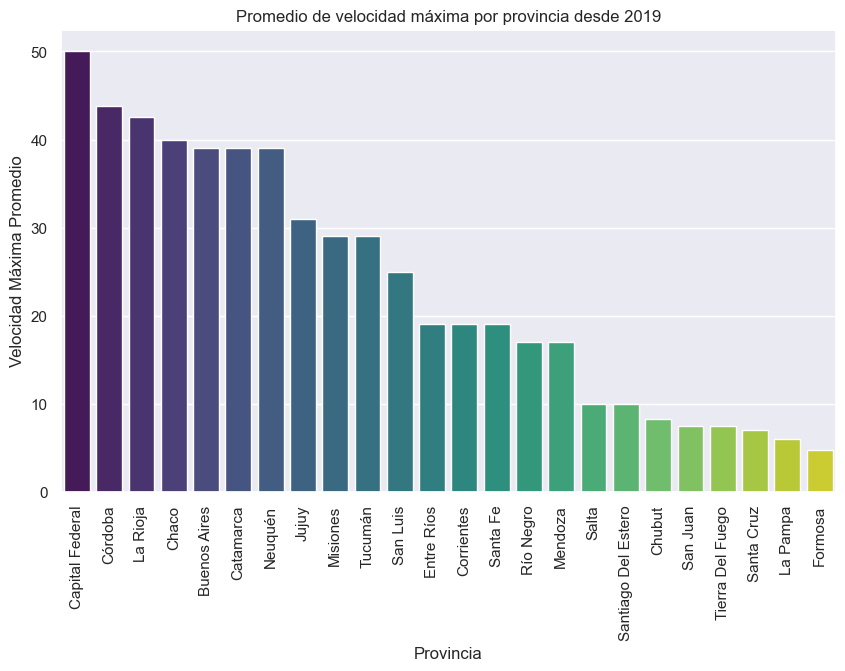

In [ ]:
# Seleccionar solo los datos a partir de 2019
result2019 = result[result['Año'] >= 2019]

# Calcular el promedio de velocidad máxima por provincia
promedio_por_provincia = result2019.groupby('Provincia')['Max_Velocidad'].mean()

# Ordenar las provincias por el promedio de velocidad máxima
promedio_por_provincia = promedio_por_provincia.sort_values(ascending=False)

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_por_provincia.index, y=promedio_por_provincia.values, palette="viridis")

plt.title('Promedio de velocidad máxima por provincia desde 2019')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Máxima Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


En base a estos datos procedemos a sacar el KPI, para lo cual debemos obtener el promedio de crecimiento entre cada una de las provincias y luego 
a este crecimiento sacarle el promedio. Nuestro resultado demuestra que existe un crecimiento promedio de velocidad de internet entre los años
2017 a 2022 de 459% es decir que podemos estimar que para el año 2023 la tasa de velocidad aumentaría posiblemente un 122% 

In [ ]:
# Seleccionar los años inicial y final para calcular el porcentaje de crecimiento
año_inicial = 2019
año_final = 2022

# Filtrar las filas correspondientes a los años seleccionados
data_inicial = result[result['Año'] == año_inicial]
data_final = result[result['Año'] == año_final]

# Inicializar una lista para almacenar los porcentajes de crecimiento por provincia
crecimiento_por_provincia = []

# Calcular el porcentaje de crecimiento para cada provincia y almacenarlo en la lista
for provincia in result['Provincia'].unique():
    velocidad_inicial = data_inicial[data_inicial['Provincia'] == provincia]['Max_Velocidad'].astype(float).values[0]
    velocidad_final = data_final[data_final['Provincia'] == provincia]['Max_Velocidad'].astype(float).values[0]
    crecimiento = ((velocidad_final - velocidad_inicial) / velocidad_inicial) * 100
    crecimiento_por_provincia.append(int(crecimiento))  # Convertir el resultado a entero

# Calcular el promedio de crecimiento entre las provincias
promedio_crecimiento_provincias = sum(crecimiento_por_provincia) / len(crecimiento_por_provincia)

# Imprimir el promedio de crecimiento entre las provincias
print(f"El promedio de crecimiento en velocidad de internet entre las provincias entre {año_inicial} y {año_final} es: {int(promedio_crecimiento_provincias)}%")  # Convertir el resultado a entero

# Calcular el crecimiento promedio anual
crecimiento_promedio_anual = promedio_crecimiento_provincias / (año_final - año_inicial)
print(f"El crecimiento promedio anual estimado es: {int(crecimiento_promedio_anual)}%")  # Convertir el resultado a entero

El promedio de crecimiento en velocidad de internet entre las provincias entre 2019 y 2022 es: 368%
El crecimiento promedio anual estimado es: 122%


Obtengo el análisis del siguiente DF Conectividad_Servicio_Internet, dado que puede arrojar 
datos del tipo de internet por provincia y se pueden sacar metricas de allí y saber cual es 
el tipo de internet predominante en Argentina.

In [ ]:
#Reviso mis datos, lo primero que noto es que en Provincias está todo en mayúscula y no es agradable a la vista, lo decido normalizar
Conectividad_Servicio_Internet.head(5)


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [ ]:
# Convertir la primera letra en mayúscula y el resto en minúscula
Conectividad_Servicio_Internet['Provincia']= Conectividad_Servicio_Internet['Provincia'].str.lower().str.capitalize()
Conectividad_Servicio_Internet

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,Buenos aires,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,Buenos aires,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,Buenos aires,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,Buenos aires,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,Buenos aires,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,Chaco,Quitilipi,Quitilipi,24517,SI,--,--,SI,--,SI,SI,SI,SI,22133010.0,"-26,8732071732978","-60,2185241226399"
4308,Chaco,Quitilipi,Villa El Palmar,879,--,--,--,--,--,SI,--,--,SI,22133020.0,"-26,4551186226266","-60,1646165913523"
4309,Chaco,San Fernando,Barranqueras,54698,SI,SI,--,SI,--,SI,SI,SI,SI,22140010.0,"-27,4877739289761","-58,9327416886365"
4310,Chaco,San Fernando,Basail,1929,SI,SI,--,--,SI,SI,SI,SI,SI,22140020.0,"-27,8868655966917","-59,2791003619491"


In [ ]:
# Seleccionar las columnas relevantes
columnas_relevantes = ["Provincia", "Localidad", "ADSL", "CABLEMODEM", "DIALUP", "FIBRAOPTICA", "SATELITAL", "WIRELESS", "TELEFONIAFIJA", "3G", "4G"]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reducido = Conectividad_Servicio_Internet.reindex(columns=columnas_relevantes)

# Utilizar la función melt para transformar las columnas en filas
df_melted = df_reducido.melt(id_vars=["Provincia", "Localidad"], var_name="Tipo de Internet", value_name="Disponible")

# Filtrar los casos donde la conexión está disponible
df_disponible = df_melted[df_melted["Disponible"] != "--"]

# Imprimir el DataFrame resultante
df_disponible


,Provincia,Localidad,Tipo de Internet,Disponible
2,Buenos aires,Balcarce,ADSL,SI
8,Buenos aires,Baradero,ADSL,SI
11,Buenos aires,Villa Alsina (Est. Alsina),ADSL,SI
14,Buenos aires,General Las Heras (Est. Las Heras),ADSL,SI
24,Buenos aires,Ranchos,ADSL,SI
...,...,...,...,...
38803,Chaco,Quitilipi,4G,SI
38804,Chaco,Villa El Palmar,4G,SI
38805,Chaco,Barranqueras,4G,SI
38806,Chaco,Basail,4G,SI


In [ ]:
#Se continúa la normalización de datos 
import re #importo regex

# Definir los patrones de regex para los valores que deseas normalizar
patrones = r"CABLEMODEM|DIALUP|FIBRAOPTICA|SATELITAL|WIRELESS|TELEFONIAFIJA"

# Filtrar los valores que coinciden con los patrones utilizando regex
mascara = df_disponible['Tipo de Internet'].str.contains(patrones, flags=re.IGNORECASE, regex=True)

# Crear una copia del DataFrame para trabajar directamente en el original
df_disponible = df_disponible.copy()

# Aplicar la normalización solo a los valores filtrados
df_disponible.loc[mascara, 'Tipo de Internet'] = df_disponible.loc[mascara, 'Tipo de Internet'].str.lower().str.capitalize()
df_disponible


,Provincia,Localidad,Tipo de Internet,Disponible
2,Buenos aires,Balcarce,ADSL,SI
8,Buenos aires,Baradero,ADSL,SI
11,Buenos aires,Villa Alsina (Est. Alsina),ADSL,SI
14,Buenos aires,General Las Heras (Est. Las Heras),ADSL,SI
24,Buenos aires,Ranchos,ADSL,SI
...,...,...,...,...
38803,Chaco,Quitilipi,4G,SI
38804,Chaco,Villa El Palmar,4G,SI
38805,Chaco,Barranqueras,4G,SI
38806,Chaco,Basail,4G,SI


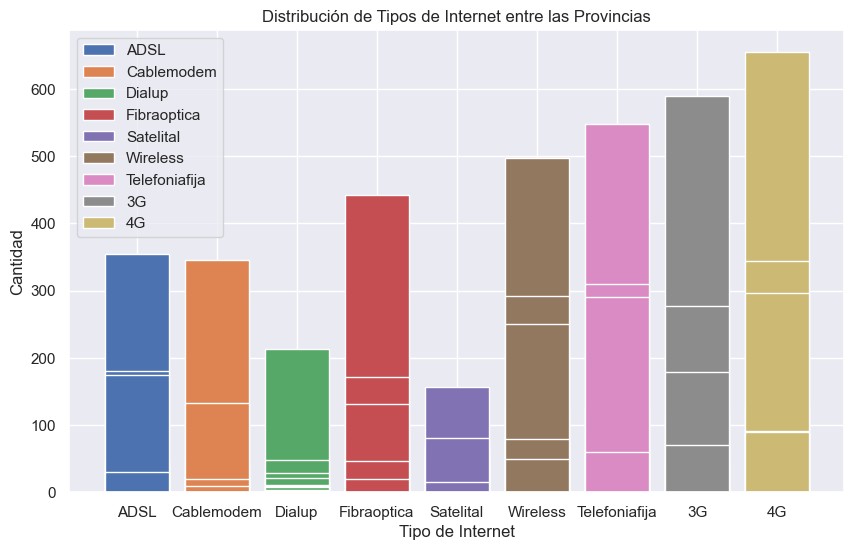

In [ ]:
# Obtener el conjunto único de provincias
provincias_unicas = df_disponible['Provincia'].unique()

# Obtener el conjunto único de tipos de internet
tipos_internet_unicos = df_disponible['Tipo de Internet'].unique()

# Agrupar por provincia y tipo de internet para contar la distribución
distribucion = df_disponible.groupby(['Provincia', 'Tipo de Internet']).size().reset_index(name='Cantidad')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))

# Iterar sobre cada tipo de internet
for i, tipo_internet in enumerate(tipos_internet_unicos):
    tipo_internet_provincias = distribucion[distribucion['Tipo de Internet'] == tipo_internet]
    cantidades = tipo_internet_provincias['Cantidad'].values
    
    # Crear las posiciones de las barras para cada tipo de internet
    x = [i] * len(cantidades)
    
    # Graficar las barras
    plt.bar(x, cantidades, label=tipo_internet)
    
# Configurar el eje x
plt.xticks(range(len(tipos_internet_unicos)), tipos_internet_unicos)
plt.xlabel('Tipo de Internet')

# Configurar el eje y
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Internet entre las Provincias')
plt.legend()

# Mostrar la gráfica
plt.show()

#Conclusion: En la gráfica se muestra la distribución del tipo de internet en relación a las diferentes provincias observando una
#predomininancia de la telefonía móvil 4G

In [ ]:
#Obtengo el valor de tipo de internet con provincia y grafico 
df_provincia_tipo_internet = df_disponible.groupby('Provincia')['Tipo de Internet'].value_counts()

df_provincia_tipo_internet

Provincia     Tipo de Internet
Buenos aires  4G                  655
              3G                  590
              Telefoniafija       548
              Wireless            497
              Fibraoptica         443
                                 ... 
Tucuman       ADSL                 30
              Fibraoptica          20
              Satelital            15
              Cablemodem            9
              Dialup                1
Name: count, Length: 213, dtype: int64

Obtenemos metricas que indiquen la tasa de crecimiento en ganancia por miles de pesos argentino para ello
usamos el DF Ingresos por Miles

In [ ]:
#Se convierten la columna de Ingresos (miles de pesos)
Internet_ingresos['Ingresos (miles de pesos)'] = Internet_ingresos['Ingresos (miles de pesos)'].str.replace('.', '').str.replace(',', '').astype(int)

In [ ]:
#Se agrupa por año e Ingresos miles de pesos
Internet_ingresos = Internet_ingresos.groupby('Año').sum()
Internet_ingresos.drop(['Trimestre', 'Periodo'], axis=1, inplace=True)

In [ ]:
Internet_ingresos.reset_index()

,Año,Ingresos (miles de pesos),Crecimiento_anual
0,2014,13683949,NaN
1,2015,20108814,46.951834
2,2016,26867508,33.610605
3,2017,39671973,47.657807
4,2018,59539594,50.079740
5,2019,86772531,45.739205
6,2020,127585840,47.034826
7,2021,163383869,28.057995
8,2022,182981651,11.994931


In [ ]:
# Calculamos la tasa de crecimiento en porcentaje
Internet_ingresos['Crecimiento_anual'] = Internet_ingresos['Ingresos (miles de pesos)'].pct_change() * 100

# Replace NaN values with 0 for the year 2014
Internet_ingresos.loc[Internet_ingresos['Año'] == 2014, 'Crecimiento_anual'] = 0


In [121]:
#Realizo un reindex de columna
Internet_ingresos = Internet_ingresos.reset_index()

In [122]:
#Garantizo que si quedaran
Internet_ingresos.columns

Index(['Año', 'Ingresos (miles de pesos)', 'Crecimiento_anual'], dtype='object')

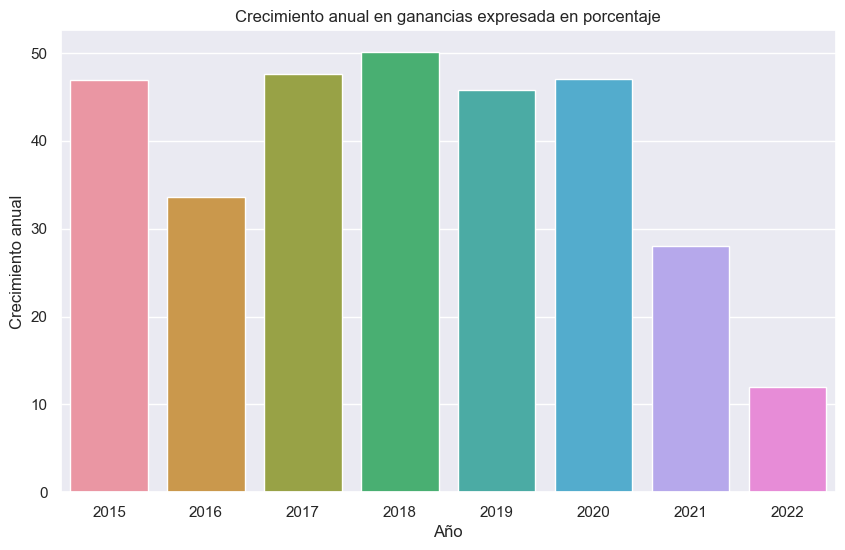

In [133]:
# Filtrar el DataFrame para omitir el año 2014
Internet_ingresos_filtered = Internet_ingresos[Internet_ingresos['Año'] != 2014]

# Ordenar el DataFrame filtrado por Crecimiento_anual de forma decreciente
Internet_ingresos_sorted = Internet_ingresos_filtered.sort_values('Crecimiento_anual', ascending=False)

sns.set(style='darkgrid', palette='viridis')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Crecimiento_anual', data=Internet_ingresos_sorted)

# Personalizar el gráfico
plt.title('Crecimiento anual en ganancias expresada en porcentaje')
plt.xlabel('Año')
plt.ylabel('Crecimiento anual')

# Mostrar el gráfico
plt.show()

#En este grafico se observa que el mayor crecimiento anual en cuando a ganancias con relacion al año anterior
#está representado por el año 2018, seguido del 2017

Busco el KPI asociado a ganancias

In [137]:
#Se obtuvieron las metricas para crecimiento porcentual por año, a partir de ello se realiza un modelo de regresión lineal para
#calcular que se esperaría para el 4 trimestre y año 2023

from sklearn.linear_model import LinearRegression #Importo la libería sklearn para obtener la regresión lineal

# Creo una variable para considerar datos hasta 2022, utilizo el método dropna dado que 2014 no tiene datos y debe omitirse
datos_hasta_2022 = datos_hasta_2022.dropna(subset=['Crecimiento_anual'])

# Creo el modelo de regresión lineal para ello asigno las variables dependiente e independiente
X = datos_hasta_2022['Año'].values.reshape(-1, 1) #Variable Independiente
y = datos_hasta_2022['Crecimiento_anual'] #Variable dependiente, es mi objetivo real lo que quiero saber, ¿que pasará? o puedo esperar basado en mi comportamiento anterior
modelo.fit(X, y)


# Predecir los ingresos para el cuarto trimestre de 2022 y el año 2023
ingresos_2022 = modelo.predict([[2022]]) #predict es una extensión que me permite saber en base a los datos lo que puede suceder
ingresos_2023 = modelo.predict([[2023]])

# Mostrar los resultados
print("Ingresos proyectados para el cuarto trimestre de 2022:", ingresos_2022[0])
print("Ingresos proyectados para el año 2023:", ingresos_2023[0])


Ingresos proyectados para el cuarto trimestre de 2022: 27.279582589137135
Ingresos proyectados para el año 2023: 23.96207252132899


Se obtien el KPI en forma visual, ganancias esperadas para 4 trimestre del 2022 y 2023

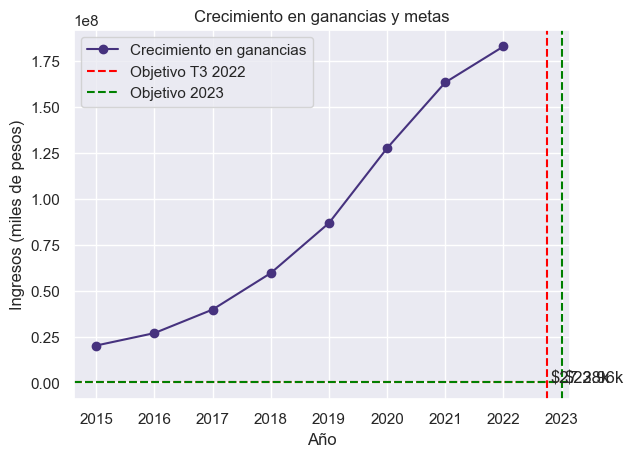

In [149]:
# Crear el gráfico de crecimiento en ganancias, se realizaz con ingreso en miles por temas de practicidad
plt.plot(datos_hasta_2022['Año'], datos_hasta_2022['Ingresos (miles de pesos)'], marker='o', label='Crecimiento en ganancias')

# Establecer las metas u objetivos para el tercer trimestre de 2022 y el año 2023
plt.axvline(x=2022.75, color='red', linestyle='--', label='Objetivo T4 2022')
plt.axhline(y=ingresos_2022[0], color='red', linestyle='--')
plt.text(2022.8, ingresos_2022[0]+10000, f'${ingresos_2022[0]:.2f}k')

plt.axvline(x=2023, color='green', linestyle='--', label='Objetivo 2023')
plt.axhline(y=ingresos_2023[0], color='green', linestyle='--')
plt.text(2023.05, ingresos_2023[0]+10000, f'${ingresos_2023[0]:.2f}k')

# Personalizar el gráfico
plt.title('Crecimiento en ganancias y metas')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend()

# Mostrar el gráfico
plt.show()


Realizamos el análisis de penetrancia o acceso a internet por cada 100 hogares, para ello agrupamos por año y provincia, se determina a 
partir de 2017 para no presentar discordancias con los datos de otros df 

In [153]:
#Muestro mi DF 
Internet_Penetracion

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


In [ ]:
# Filtrar y procesar los datos por año a partir de 2017
for year, data_year in Internet_Penetracion[Internet_Penetracion['Año'] >= 2017].groupby('Año'):
    # Eliminar las comas de los valores en la columna 'Accesos por cada 100 hogares'
    data_year['Accesos por cada 100 hogares'] = data_year['Accesos por cada 100 hogares'].str.replace(',', '').astype(float)
    # Calcular el promedio del acceso a Internet por cada 100 hogares para cada provincia y trimestre
    data_avg = data_year.groupby(['Provincia', 'Trimestre'])['Accesos por cada 100 hogares'].mean().reset_index()
    # Obtener la provincia con el menor acceso a Internet
    provincia_menor_acceso = data_avg.loc[data_avg['Accesos por cada 100 hogares'].idxmin()]['Provincia']
    # Obtener el valor del menor acceso a Internet
    menor_acceso = data_avg.loc[data_avg['Accesos por cada 100 hogares'].idxmin()]['Accesos por cada 100 hogares']
    # Imprimir el resultado para cada año
    print(f"Año {year}: Provincia con menor acceso a Internet: {provincia_menor_acceso}, Accesos por cada 100 hogares: {menor_acceso}")

Año 2017: Provincia con menor acceso a Internet: Santiago Del Estero, Accesos por cada 100 hogares: 147.0
Año 2018: Provincia con menor acceso a Internet: Formosa, Accesos por cada 100 hogares: 214.0
Año 2019: Provincia con menor acceso a Internet: Chubut, Accesos por cada 100 hogares: 43.0
Año 2020: Provincia con menor acceso a Internet: Santa Cruz, Accesos por cada 100 hogares: 37.0
Año 2021: Provincia con menor acceso a Internet: Santiago Del Estero, Accesos por cada 100 hogares: 47.0
Año 2022: Provincia con menor acceso a Internet: Misiones, Accesos por cada 100 hogares: 51.0


Se decide obtener datos de KPI para ello realizo una vez más modelos de regresión considerando crecimiento trimestral y Acceso por cada 100 hogares

In [162]:
# Primero ordenamos los datos por trimestree dado que existía un error en la correlacion.
datos_ordenados = Internet_Penetracion.sort_values('Trimestre') #Para ello utilizamos el método sort_value e indicamos la columna a ordenar

# Se asignan los datos de entrenamiento
X_train = datos_ordenados['Trimestre'].values.reshape(-1, 1) #Variable independiente
y_train = datos_ordenados['Accesos por cada 100 hogares'] #Variable dependiente


# Ajustar el modelo utilizando los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar la proyección para el cuarto trimestre del 2022
trimestre_2022 = 4
X_2022 = [[trimestre_2022]]
proyeccion_2022 = modelo.predict(X_2022)

# Redondear la proyección a un número entero
proyeccion_2022_entero = int(round(proyeccion_2022[0]))

# Obtener los últimos dos valores de la serie
ultimo_valor = y_train.iloc[-1]
penultimo_valor = y_train.iloc[-2]

# Calcular el crecimiento anterior y promedio
crecimiento_anterior = ultimo_valor - penultimo_valor
crecimiento_promedio = y_train.mean()

# Mostrar el resultado de la proyección y los crecimientos
print("Basado en el crecimiento por cada 100 hogares por trimestre, se espera que para el 4to trimestre del 2022 existan", proyeccion_2022_entero, "accesos por cada 100 hogares.")
print("Crecimiento anterior: {:.2f}".format(crecimiento_anterior))
print("Crecimiento promedio: {:.2f}".format(crecimiento_promedio))


Basado en el crecimiento por cada 100 hogares por trimestre, se espera que para el 4to trimestre del 2022 existan 4495 accesos por cada 100 hogares.
Crecimiento anterior: 5032.00
Crecimiento promedio: 4463.54


Dado los resultados se define generar la proyección gráfica del KPI

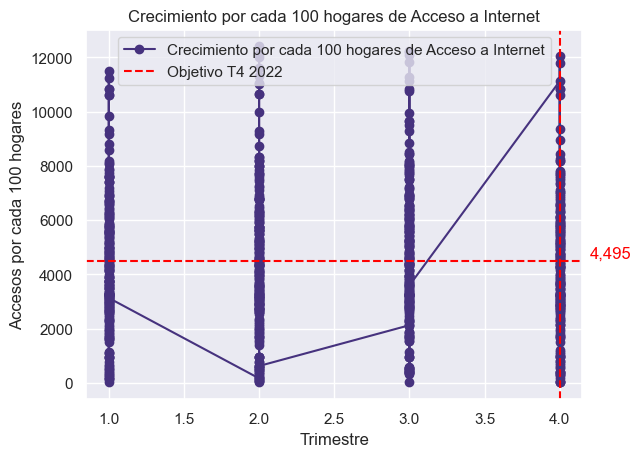

In [170]:
# Crear el gráfico de crecimiento por cada 100 hogares de acuerdo al trimestre.
plt.plot(datos_ordenados['Trimestre'], datos_ordenados['Accesos por cada 100 hogares'], marker='o', label='Crecimiento por cada 100 hogares de Acceso a Internet')

# Establecer las metas u objetivos para el 4to trimestre de 2022
plt.axvline(x=4, color='red', linestyle='--', label='Objetivo T4 2022')
plt.axhline(y=proyeccion_2022_entero, color='red', linestyle='--')
plt.text(4.2, proyeccion_2022_entero + 100, f'{proyeccion_2022_entero:,}', color='red')

# Personalizar el gráfico
plt.title('Crecimiento por cada 100 hogares de Acceso a Internet')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend()

# Mostrar el gráfico
plt.show()



Iniciamos con el calculo del PBI de Argentina

In [65]:
import pandas as pd

ruta_archivo = 'Datasets\MetadatosPBI.xlsx'
df_PBI = pd.read_excel(ruta_archivo)

In [66]:
df_PBI.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [68]:
df_PBIArgentina = df_PBI[df_PBI['Country Name'] == 'Argentina'].copy()
df_PBIArgentina.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)


In [69]:
df_PBIArgentina.columns

Index(['Country Name', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [70]:
df_PBIArgentina.dtypes


Country Name     object
1961            float64
1962            float64
1963            float64
1964            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Length: 62, dtype: object

In [83]:
# Crear una lista de años
años = ['1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Crear un nuevo DataFrame para almacenar el crecimiento del PBI
df_crecimiento_pbi = pd.DataFrame(index=df_PBIArgentina.index)

# Calcular el crecimiento porcentual del PBI año a año y agregar las columnas al nuevo DataFrame
for i in range(1, len(años)):
    crecimiento_pbi = ((df_PBIArgentina.loc[:, años[i]] - df_PBIArgentina.loc[:, años[i-1]]) / df_PBIArgentina.loc[:, años[i-1]]) * 100
    df_crecimiento_pbi[f'Crecimiento PBI {años[i]}'] = crecimiento_pbi

# Imprimir el DataFrame con los datos de crecimiento del PBI
df_crecimiento_pbi.head(59)



,Crecimiento PBI 1962,Crecimiento PBI 1963,Crecimiento PBI 1964,Crecimiento PBI 1965,Crecimiento PBI 1966,Crecimiento PBI 1967,Crecimiento PBI 1968,Crecimiento PBI 1969,Crecimiento PBI 1970,Crecimiento PBI 1971,...,Crecimiento PBI 2012,Crecimiento PBI 2013,Crecimiento PBI 2014,Crecimiento PBI 2015,Crecimiento PBI 2016,Crecimiento PBI 2017,Crecimiento PBI 2018,Crecimiento PBI 2019,Crecimiento PBI 2020,Crecimiento PBI 2021
9,-165.60804,178.340112,-222.70925,5.440919,-124.995167,-171.8441,102.121518,149.418451,-81.963912,177.032029,...,-144.799048,-158.998478,-382.738597,-145.539405,-290.840772,-156.514858,-304.910732,-17.549021,264.114608,-186.539468


In [85]:
#Este codigo es solo para que me muestre la cantidad máxima de columnas
pd.set_option('display.max_columns', None)
df_crecimiento_pbi

,Crecimiento PBI 1962,Crecimiento PBI 1963,Crecimiento PBI 1964,Crecimiento PBI 1965,Crecimiento PBI 1966,Crecimiento PBI 1967,Crecimiento PBI 1968,Crecimiento PBI 1969,Crecimiento PBI 1970,Crecimiento PBI 1971,Crecimiento PBI 1972,Crecimiento PBI 1973,Crecimiento PBI 1974,Crecimiento PBI 1975,Crecimiento PBI 1976,Crecimiento PBI 1977,Crecimiento PBI 1978,Crecimiento PBI 1979,Crecimiento PBI 1980,Crecimiento PBI 1981,Crecimiento PBI 1982,Crecimiento PBI 1983,Crecimiento PBI 1984,Crecimiento PBI 1985,Crecimiento PBI 1986,Crecimiento PBI 1987,Crecimiento PBI 1988,Crecimiento PBI 1989,Crecimiento PBI 1990,Crecimiento PBI 1991,Crecimiento PBI 1992,Crecimiento PBI 1993,Crecimiento PBI 1994,Crecimiento PBI 1995,Crecimiento PBI 1996,Crecimiento PBI 1997,Crecimiento PBI 1998,Crecimiento PBI 1999,Crecimiento PBI 2000,Crecimiento PBI 2001,Crecimiento PBI 2002,Crecimiento PBI 2003,Crecimiento PBI 2004,Crecimiento PBI 2005,Crecimiento PBI 2006,Crecimiento PBI 2007,Crecimiento PBI 2008,Crecimiento PBI 2009,Crecimiento PBI 2010,Crecimiento PBI 2011,Crecimiento PBI 2012,Crecimiento PBI 2013,Crecimiento PBI 2014,Crecimiento PBI 2015,Crecimiento PBI 2016,Crecimiento PBI 2017,Crecimiento PBI 2018,Crecimiento PBI 2019,Crecimiento PBI 2020,Crecimiento PBI 2021
9,-165.60804,178.340112,-222.70925,5.440919,-124.995167,-171.8441,102.121518,149.418451,-81.963912,177.032029,-99.487577,5445.34529,230.444655,-144.577976,112.951422,-247.000369,-215.045407,-240.575995,-100.914991,8512.422281,-65.773676,-219.691466,-99.218326,-31031.520043,-168.970961,-74.464792,-320.69323,231.774763,-54.532948,-295.750231,-15.018796,4.611176,-34.492442,-193.139554,-202.139642,62.268112,-61.098891,-269.236016,-57.548088,185.99018,117.205562,-165.163447,2.706584,-2.467913,-10.313813,14.148975,-61.726821,-326.681243,-243.336642,-51.35576,-144.799048,-158.998478,-382.738597,-145.539405,-290.840772,-156.514858,-304.910732,-17.549021,264.114608,-186.539468


Text(0, 0.5, 'Crecimiento Porcentual')

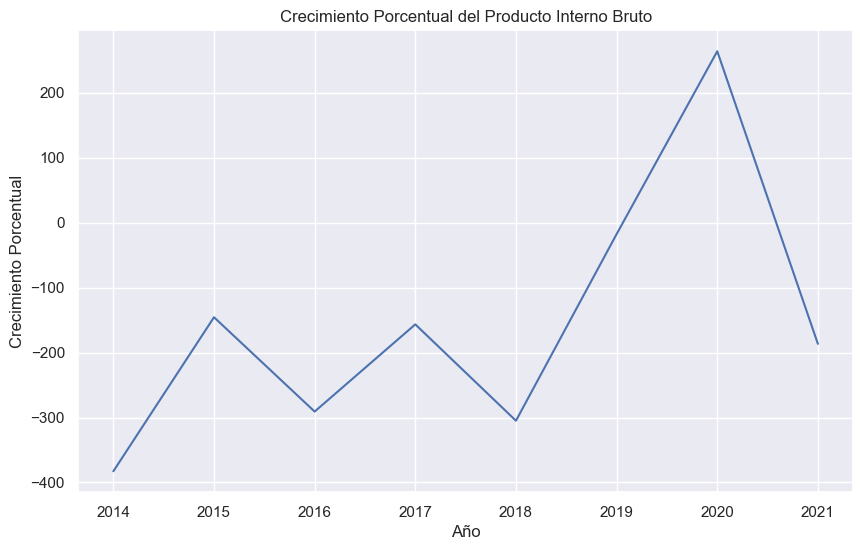

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Señalo los valores de X
años = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

crecimiento_pbi = [-382.738597, -145.539405, -290.840772, -156.514858, -304.910732, -17.549021, 264.114608, -186.539468]

# Establecer el estilo de Seaborn
sns.set(style="darkgrid")

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x=años, y=crecimiento_pbi)

plt.title('Crecimiento Porcentual del Producto Interno Bruto')
plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual')


Calculamos la correlación de Pearson para el caso entre PBI y Velocidad de Internet Bajada con la finalidad de obtener metricas que indiquen
que el sector de telecomunicaciones si contribuye con el crecimiento del pais. En nuestro caso particular se demuestra una correlacion moderada

In [97]:
import scipy.stats as stats

df_correlacion = pd.DataFrame({
    'Año': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'Crecimiento Porcentual del Producto Interno Bruto': [-382.738597, -145.539405, -290.840772, -156.514858, -304.910732, -17.549021, 264.114608, -186.539468],
    'Ganancias Porcentuales del Sector de Telecomunicaciones': [46.951834, 33.610605, 47.657807, 50.079740, 45.739205, 47.034826, 28.057995, 11.994931]
})

correlation, p_value = stats.pearsonr(df_correlacion['Crecimiento Porcentual del Producto Interno Bruto'], df_correlacion['Ganancias Porcentuales del Sector de Telecomunicaciones'])

print("La correlación de Pearson entre el Crecimiento del Producto Interno Bruto y Ganancias Porcentuales:", correlation)
print("Valor p entre entre el Crecimiento del Producto Interno Bruto y Ganancias Porcentuales:", p_value)

#los resultados indican una correlación negativa débil entre el crecimiento del PIB y las ganancias porcentuales del sector de telecomunicaciones. 
# Sin embargo, debido al valor p mayor que 0.05, no hay suficiente evidencia estadística para respaldar esta correlación como significativa.

La correlación de Pearson entre el Crecimiento del Producto Interno Bruto y Ganancias Porcentuales: -0.35266669172177556
Valor p entre entre el Crecimiento del Producto Interno Bruto y Ganancias Porcentuales: 0.39153231737757294


Considerando que el resultado demuestra que existe una aparente relacion negativa o inversa sin suficiente evidencia
estadística se decide realizar un modelo de regresión lineal

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_correlacion = pd.DataFrame({
    'Año': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'Crecimiento Porcentual del Producto Interno Bruto': [-382.738597, -145.539405, -290.840772, -156.514858, -304.910732, -17.549021, 264.114608, -186.539468],
    'Ganancias Porcentuales del Sector de Telecomunicaciones': [46.951834, 33.610605, 47.657807, 50.079740, 45.739205, 47.034826, 28.057995, 11.994931]
})

#Se llama al modelo
modelo = LinearRegression()

# Separar las variables independientes (X) y la variable objetivo (y)
X = df_correlacion[['Crecimiento Porcentual del Producto Interno Bruto']]
y = df_correlacion['Ganancias Porcentuales del Sector de Telecomunicaciones']

# Entrenar el modelo
modelo.fit(X, y)

# Realizar las predicciones
predicciones = modelo.predict(X)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R-squared)
mse = mean_squared_error(y, predicciones)
r2 = r2_score(y, predicciones)

# Imprimir las predicciones, el MSE y el R-squared
print('Predicciones:', predicciones)
print('Error Cuadrático Medio (MSE):', mse)
print('Coeficiente de Determinación (R-squared):', r2)

#Los resultados indican que el modelo de regresión lineal utilizado tiene un ajuste limitado a los datos 
# y no puede explicar de manera adecuada la relación entre el crecimiento del PIB y las ganancias del sector de telecomunicaciones. 
# Es posible que haya otros factores o variables que influyan en las ganancias del sector y que no se están considerando en este análisis univariado

Predicciones: [44.2327929  38.7278214  42.10000778 38.98254215 42.42654653 35.75739215
 29.22048012 39.67935996]
Error Cuadrático Medio (MSE): 136.69365242395514
Coeficiente de Determinación (R-squared): 0.12437379544998184
